In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
os.chdir(r'F:\MODULE 3\Lecture 02 Material-20220315')
os.listdir()

['Advertising.csv',
 'BMW_carprice.pdf',
 'bmw_prices.csv',
 'Lecture Notes - 11th_14th March.pdf',
 'marketing_mix_media.pdf',
 'Train_Test_Splitting.pdf']

In [3]:
df=pd.read_csv('bmw_prices.csv')
df.describe()

,Mileage,Age(Yrs),Sell Price($)
count,20.000000,20.000000,20.000000
mean,59736.500000,5.150000,25197.500000
std,20595.441825,1.785173,7834.479713
min,22500.000000,2.000000,12000.000000
25%,50500.000000,4.000000,19375.000000
50%,59000.000000,5.000000,26050.000000
75%,73750.000000,6.250000,31625.000000
max,91000.000000,8.000000,40000.000000


# Car Mileage Vs Sell Price ($)

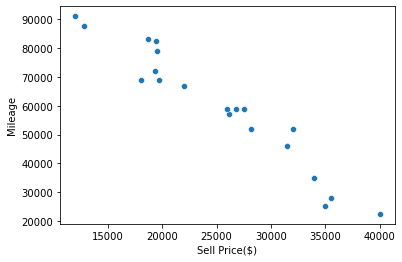

In [4]:
sns.scatterplot(data=df,x='Sell Price($)',y='Mileage');

In [5]:
# It has Linear relationship 
# As the mileage is increasing the selling price is decreasing 

# Car Age Vs Sell Price($)


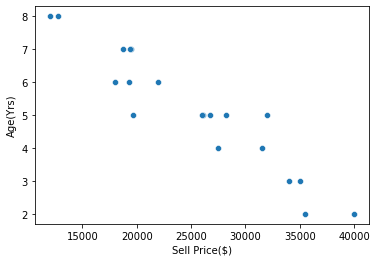

In [6]:
sns.scatterplot(data=df,x='Sell Price($)',y='Age(Yrs)');

In [7]:
# This also has linear relatioonship
# As the Age is incresing the selling pric eis decreasing 


# Defining the X and Y variables for our linear model creation

In [8]:
x=df.loc[:,df.columns!='Sell Price($)']
y=df['Sell Price($)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Mileage,Age(Yrs)
6,52000,5
13,58780,4
17,69000,5
5,59000,5
19,52000,5
9,67000,6
12,59000,5
10,83000,7
7,72000,6
15,25400,3


In [11]:
# Here we divided the train and test in 80:20 ratio 

In [12]:
len(x_train)

16

In [13]:
len(x_test)

4

In [14]:
len(y_train)

16

In [15]:
len(y_test)

4

# if you want to keep the same set of observations for your training and test dataset


### random_state is used 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
x_train

,Mileage,Age(Yrs)
4,46000,4
2,57000,5
10,83000,7
16,28000,2
13,58780,4
1,35000,3
6,52000,5
17,69000,5
14,82450,7
7,72000,6


In [17]:
x_test

,Mileage,Age(Yrs)
19,52000,5
15,25400,3
3,22500,2
9,67000,6


In [18]:
# Let's import the Linear Regression class from sklearn.

In [19]:
# linear_model is used and imported LinearRegression
# An object is created with LinearRegression()

In [20]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

## Now, fitting the model using the training data

In [21]:
clf.fit(x_train,y_train)

LinearRegression()

In [22]:
y_predicted=clf.predict(x_test)
y_predicted

array([28681.95433134, 39005.18556196, 39709.37312372, 22791.72066882])

In [23]:
clf.score(x_test,y_test)

0.9084263696253886

In [24]:
# importing r2_score module

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


In [26]:
# The Mean squared error is the difference bewteen the actual y and predicted y whole square
# We need to reduce this

In [27]:
score = r2_score(y_test,y_predicted)
print(score)
print(mean_squared_error(y_test,y_predicted))
print(np.sqrt(mean_squared_error(y_test,y_predicted)))


0.9084263696253886
4246269.24047073
2060.647772053907


In [28]:
x_test

,Mileage,Age(Yrs)
19,52000,5
15,25400,3
3,22500,2
9,67000,6


In [29]:
y_test

19    28200
15    35000
3     40000
9     22000
Name: Sell Price($), dtype: int64

In [40]:
y_actual=y
df_temp=pd.DataFrame({'Actual':y_test,'Predicted':y_predicted})
df_temp

,Actual,Predicted
19,28200,28681.954331
15,35000,39005.185562
3,40000,39709.373124
9,22000,22791.720669


In [42]:
from matplotlib.pyplot import figure

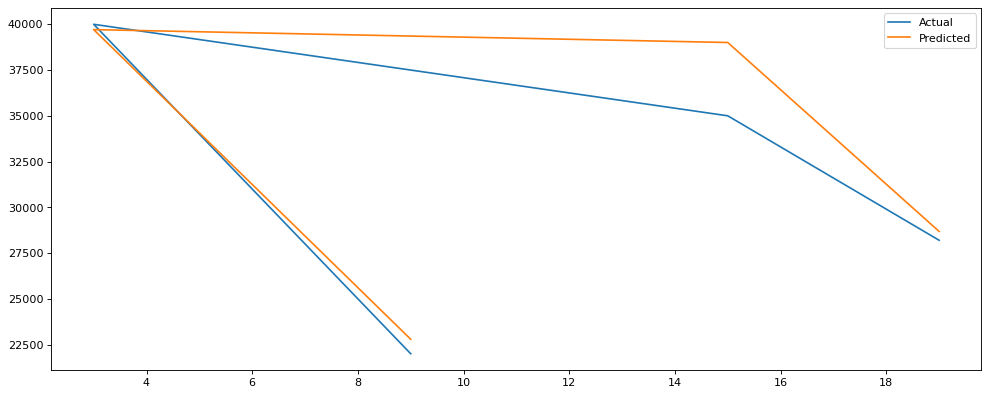

In [43]:
figure(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()